# SVM and Logistic Regression Modeling
* Ben Brock
* Gene Ledbetter
* Sanjay Jagarlamudi
* Sarah Beg


# In this Mini-Lab our goal is to use the US census data to build a model to predict if the income of any individual in the US is greater than or less than USD 50000 based on the information available about that individual in the census data.

# Understanding the Data

Popularly known as the "Adult" dataset, this dataset was found on the UCI Machine Learning repository http://archive.ics.uci.edu/ml/datasets/Census+Income. 

The dependent variable is “incomelevel”, representing the level of income. A value of “<=50K” indicates “less than or equal to USD 50000” and “>50K” indicates “greater than USD 50000”.

Below are the independent variables (features or predictors) from our dataseta.


    Age: Age of the individual (Continuous) Numeric 

    Workclass: Class of Work (Categorical) 
    Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked 

    fnlwgt: Final Weight Determined by Census Org (Continuous) Numeric 

    Education: Education of the individual (Ordered Factor) 
    Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
 
    Education-num: Number of years of education (Continuous) Numeric
 
    Marital-status: Marital status of the individual (Categorical) 
    Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
 
    Occupation: Occupation of the individual (Categorical)  
    Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 

    Relationship: Present relationship (Categorical)
    Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
 
    Race: Race of the individual (Categorical)
    White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

    Sex: Sex of the individual (Categorical)
    Female, Male 

    Capital-gain: Capital gain made by the individual (Continuous) Numeric 

    Capital-loss: Capital loss made by the individual (Continuous) Numeric
 
    Hours-per-week: Average number of hours spent by the individual on work (Continuous) Numeric 

    Native-country: Native country of orgin (Categorical)
     United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands 


# Preparing the Data

In [1]:
# This code imports the packages we will be using, and sets parameters for the matplotlib.pylab package.

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import graphlab as gl
import graphlab
# keep data visualizations within notebook
graphlab.canvas.set_target('ipynb')

In [13]:
df_income = None
df_final_income = None
sf_final_2014 = None
df_indicators = None
df_flt = None
df_s = None
df_all = None
df_all_2014 = None

In [14]:
# Path to where all of the data set files resides 
path = 'data'

In [15]:
filename = path + '/income.csv'
df_income = pd.read_csv(filename) # read in the csv file
df_income.info()
df_income['target'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target, dtype: object

In [16]:
# This code turns all of our string entries into integer entries for the purposes of feeding them into the SVM.
# The code in this section is based upon examples found at scikit-learn.org/stable/modules/preprocessing.html#label-encoding

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_income['workclass'] = encoder.fit_transform(df_income['workclass'])
df_income['native-country'] = encoder.fit_transform(df_income['native-country'])
df_income['education'] = encoder.fit_transform(df_income['education'])
df_income['marital-status'] = encoder.fit_transform(df_income['marital-status'])
df_income['occupation'] = encoder.fit_transform(df_income['occupation'])
df_income['relationship'] = encoder.fit_transform(df_income['relationship'])
df_income['race'] = encoder.fit_transform(df_income['race'])
df_income['sex'] = encoder.fit_transform(df_income['sex'])

df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [17]:
# This code creates a target array with 0 representing under 50,000 USD a year and 1 representing over 50,000 USD a year

i = 0
rangeLength = len(df_income)
print(rangeLength)
target = []
for i in range(0,rangeLength):
    if df_income['target'].iloc[i] == " <=50K":
        target.append(0)
    else:
        target.append(1)

32561


In [18]:
# This drops the target column from the data

df_income = df_income.drop('target', axis=1)

In [19]:
# This creates the 80/20 train test split for our cross validation
# We chose an 80/20 split as it would give us a good amount of test data, and we can afford to only train on 80% because we 
# have so many observations to work with.

X = df_income
y = target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Why we fit a Perceptron to the data:  
Since we are doing a binary classification task, separating into only two groups of below 50k income and above 50k income, then a Perceptron classifier is well suited to the task.  It is also a relatively easy classifier to code and get a quick result from it.  By performing this step of fitting a Perceptron and gathering the accuracy we will get a feel for what it is like to run a classifier on this data, as well as get a ballpark accuracy number that we can reference in our logistic regression.  If we find that our logistic regression gives us an accuracy score that is close to what the Perceptron classifier got us then we will have more confidence that we have not made some critical error in the process.  Therefore, while our objective is to obtain the accuracy from a logistic regression, obtaining accuracy from a Perceptron will help us have greater confidence in our results so we know when we have achieved our objective.

In [20]:
# This code builds a Perceptron and fits the training data to it.

from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [21]:
# This reports the number of samples that were misclassified by the model

y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1406


In [22]:
# This reports the accuracy of our predictor as a percentage

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.78


# Modeling

## Logistic Regression Model

Please carefully describe every assumption and every step in your report.  
  
  [50 points] Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them more
accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use.  


Here, we used the in class **"04. Logits and SVM IPython Notebook**  as a guide.


### Binary Classification

* **Python 2.7 skLearn Libraries**
* **Similar to the analysis done with Logistic Regression Model Dr. Eric Larson**

In [23]:
filename = path + '\income.csv'
df_income = pd.read_csv(filename) # read in the csv file
df_income.info()
df_income['target'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target, dtype: object

In [24]:
# This code turns all of our string entries into integer entries for the purposes of feeding them into the SVM.
# The code in this section is based upon examples found at scikit-learn.org/stable/modules/preprocessing.html#label-encoding

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_income['workclass'] = encoder.fit_transform(df_income['workclass'])
df_income['native-country'] = encoder.fit_transform(df_income['native-country'])
df_income['education'] = encoder.fit_transform(df_income['education'])
df_income['marital-status'] = encoder.fit_transform(df_income['marital-status'])
df_income['occupation'] = encoder.fit_transform(df_income['occupation'])
df_income['relationship'] = encoder.fit_transform(df_income['relationship'])
df_income['race'] = encoder.fit_transform(df_income['race'])
df_income['sex'] = encoder.fit_transform(df_income['sex'])

df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [25]:
# Pythonic way of creating a new binary variable
# This code creates a target array 
# - with 0 representing under 50,000 USD a year and 
# - 1 representing over 50,000 USD a year
df_income['is_target'] = df_income['target'] == " <=50K"
df_income.is_target = df_income.is_target.astype(np.int)

In [26]:
df_income['is_target'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_target, dtype: int32

In [27]:
df_income['is_target']
len(df_income['is_target'])

32561

In [28]:
# This drops the target column from the data
# Clean up the data set and remove the target column
if 'target' in df_income:
    del df_income['target']
    
list(df_income)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'is_target']

In [29]:
# rename columns with the '-' character and replace with '_'
df_income.rename(columns={'education-num': 'education_num',
                          'marital-status': 'marital_status',
                          'capital-gain': 'capital_gain',
                          'capital-loss': 'capital_loss',
                          'hours-per-week': 'hours_per_week',
                          'native-country': 'native_country'}, 
                 inplace=True)
list(df_income)

df_final_income = df_income

### Training and Testing Split
For training and testing purposes, let's gather the data we have and grab 80% of the instances for training and the remaining 20% for testing. Moreover, let's repeat this process of separating the testing and training data three times. 

#### Why we chose 3 fold cross validation:  
The reason why we repeat this process three times, or a three fold cross validation, is because it strikes a compromise between speed and accuracy when working on our limited timeframe and commodity hardware.  If we were working on more expensive hardware and had more time to compile we would have preferred to use 10 fold cross validation on a 90/10 split.  However, for the purposes of this assignment it is prudent to compromise on a little bit of accuracy in order to ensure we are able to compile the code and interpret the results in a timely fasion.  We will use the hold out cross validation method built into `scikit-learn`.

In [30]:
from sklearn.cross_validation import ShuffleSplit

# The following code puts our values in easy to use X and y variables:
if 'is_target' in df_income:
    y = df_income['is_target'].values 
    del df_income['is_target'] 
    X = df_income.values 
    
    
#This code sets up three folds of cross validation, which as mentioned above we are using in order to sacrifice a little bit 
#of accuracy to save a lot of time running the model on commodity hardware.
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(32561, n_iter=3, test_size=0.2, random_state=None)


### Logistic Regression using scikit-learn

The following code is based upon principles and examples found in the following documentation:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
#First we set up the Logistic Regression classifier object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) 

# Starting at 0 we run through each iteration:
iter_num=0
for train_indices, test_indices in cv_object: 
    #This code creates new variables for the current iteration:
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # This code trains the classifier and creates a y_hat prediction variable
    lr_clf.fit(X_train,y_train) 
    y_hat = lr_clf.predict(X_test) 

    # This code gets and prints the accuracy for each iteration
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

('====Iteration', 0, ' ====')
('accuracy', 0.7858129894058038)
('confusion matrix\n', array([[ 483, 1126],
       [ 269, 4635]]))
('====Iteration', 1, ' ====')
('accuracy', 0.79947796714263775)
('confusion matrix\n', array([[ 439, 1145],
       [ 161, 4768]]))
('====Iteration', 2, ' ====')
('accuracy', 0.80346998311070172)
('confusion matrix\n', array([[ 411, 1109],
       [ 171, 4822]]))


In [32]:
# this does the exact same thing as the above block of code, but with shorter syntax.  The only purpose we have of including 
# this block is to demonstrate another way that the same purpose can be achieved using different code.
# As you may notice the accuracy scores are nearly, but not quite, identical from this block of code with the shorter syntax
# as compared to the previous block of code with the longer syntax.

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train classifier
    y_hat = lr_clf.predict(X[test_indices]) # make a y_hat variable with predictions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

('====Iteration', 0, ' ====')
('accuracy', 0.79610010747735294)
('confusion matrix\n', array([[ 441, 1117],
       [ 211, 4744]]))
('====Iteration', 1, ' ====')
('accuracy', 0.79087977890373096)
('confusion matrix\n', array([[ 466, 1128],
       [ 234, 4685]]))
('====Iteration', 2, ' ====')
('accuracy', 0.79149393520651001)
('confusion matrix\n', array([[ 432, 1143],
       [ 215, 4723]]))


In [33]:
# and here is an even shorter way of getting the accuracies for each training and test set.  This too is included just to show
# a number of different ways to achieve the same result with shorter and shorter code.
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) 
print(accuracies)

[ 0.79778904  0.79824965  0.79364348]


# Cost Analysis

## sklearn.linear_model.LogisiticRegression

Here, we will focus only on the three input variables to the LogisticRegression constructor.

* **penalty:** str, ‘l1’ or ‘l2’, default: ‘l2’
  * Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties


* **C:** float, default: 1.0
  * Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    
 
* **class_weight:** dict or ‘balanced’, default: None
  * Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

  * The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

  * Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified


From the LogisticRegression constructor input values:

1. **penalty = 'l2'**
2. **C=cost**
3. **class_weight = None**


The **penalty** solvers, 'newton-cg', 'sag' and 'lbfgs' solvers support only l2 penalties. The **class_weight** is set to ***None** which all classes are supposed to have a weight of one.


The input constructor value, **"*C"**, is of special interest.  As the user guide of the sklearn.linear_model.LogisiticRegression states, it must be positive and it represents the inverse of regularization strength.   As a way of interpreting this, basically the smaller the C value, should specify a stronger regularization.  The code below we vary the cost variable from 0.001, 5.0, and 0.05.  We can see the output predicted values of the Logistic Regression model is 79.25% when the cost value is 0.001 and 80.01% when the cost value is 0.05.  We have described is a way to learn and interpret the logistic regression model with regularization.


* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [35]:
# here we can change some of the parameters interactively, yet another way of achieving the same result.
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None)
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) 
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.79256871  0.80454476  0.80070628]


<function __main__.lr_explor>

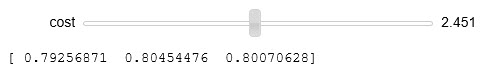

In [36]:
from IPython.display import Image 
Image(filename="images/Cost.jpg")

## Interpreting weights
In this section we will be interpreting the weights of our model in order to find out what attributes the model found were most important.  This can sometimes give us even more relevant information than the accuracy score depending on our question of interest.

In [24]:
# This code transposes the weights to make a column vector.
weights = lr_clf.coef_.T 
variable_names = df_income.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    

('age', 'has weight of', -0.011108884390178165)
('workclass', 'has weight of', 0.0047756822941056537)
('fnlwgt', 'has weight of', 2.0799664961397507e-06)
('education', 'has weight of', 0.0083949187381818051)
('education_num', 'has weight of', -0.0048283911426407512)
('marital_status', 'has weight of', 0.012665613211918279)
('occupation', 'has weight of', 0.0020882893135706548)
('relationship', 'has weight of', 0.013275952129985587)
('race', 'has weight of', 0.0043390246706895763)
('sex', 'has weight of', -0.0016771572171122425)
('capital_gain', 'has weight of', -0.00034545325496018839)
('capital_loss', 'has weight of', -0.00075670104890636824)
('hours_per_week', 'has weight of', -0.0081613048964843705)
('native_country', 'has weight of', 0.044537816386523564)


Next, we will need to standardize these values in some way before we can gain any meaningful interpretation of them.  This is because non-standardized values can vary so wildly that it is almost useless to compare the two.  We will elect to use a standardization scale that adjusts everything based upon their zero mean and unit standard deviation.  

In [25]:
from sklearn.preprocessing import StandardScaler


# scale attributes by the zero mean and unit standard deviation found in the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 

# this code applies this scaling to the training and test set
X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test) 

# trains the model as normal
lr_clf = LogisticRegression(penalty='l2', C=0.05) 
lr_clf.fit(X_train_scaled,y_train)  

y_hat = lr_clf.predict(X_test_scaled) 

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort and print attributes by magnitude of their weight
zip_vars = zip(lr_clf.coef_.T,df_income.columns) 
zip_vars.sort(key = lambda t: np.abs(t[0])) 
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

('accuracy:', 0.82250882849685247)
[[ 719  860]
 [ 296 4638]]
('native_country', 'has weight of', -0.017256606963635086)
('workclass', 'has weight of', 0.031481925875203091)
('occupation', 'has weight of', -0.037036336494097974)
('fnlwgt', 'has weight of', -0.03946515560454246)
('education', 'has weight of', -0.053870270702857659)
('race', 'has weight of', -0.10028078185894418)
('relationship', 'has weight of', 0.1839104371210685)
('capital_loss', 'has weight of', -0.26794196693625755)
('marital_status', 'has weight of', 0.34735835103168339)
('hours_per_week', 'has weight of', -0.37644861968458898)
('sex', 'has weight of', -0.42288615330893431)
('age', 'has weight of', -0.46122638365665575)
('education_num', 'has weight of', -0.82854873377761273)
('capital_gain', 'has weight of', -2.0906883843434145)


C:\Users\Ben\Anaconda6\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ben\Anaconda6\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ben\Anaconda6\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


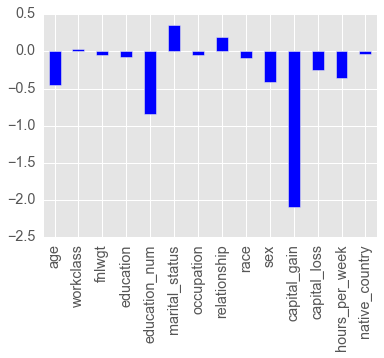

In [41]:
# This code creates a plot of our findings using a pandas Series
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df_income.columns)
weights.plot(kind='bar')
plt.show()

C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to f

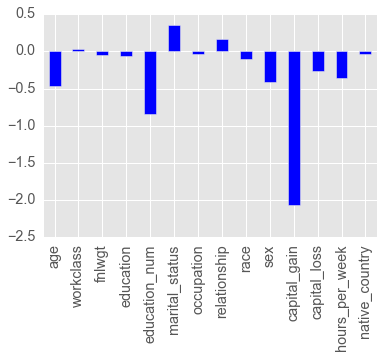

In [42]:
# In this code we implement the scaling within a pipeline and once again plot the weights for analysis.

from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# This code builds the pipeline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])


for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    

trained_model_from_pipeline = piped_object.named_steps['logit_model']

# This code plots the weights
weights = pd.Series(trained_model_from_pipeline.coef_[0],index=df_income.columns)
weights.plot(kind='bar')
plt.show()

## Support Vector Machine Model 

[50 points] Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use.


In [44]:
# First we recreate a scaled X_train and X_test variables (most other variables we keep from previous cells:
X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test) 

# Next we import the SVM, train the model, and report the accuracy score as we have in the past
from sklearn.svm import SVC
from sklearn import metrics as mt

svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') 
svm_clf.fit(X_train_scaled, y_train) 

y_hat = svm_clf.predict(X_test_scaled) 

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

1 loops, best of 3: 27.9 s per loop
accuracy: 0.815446031015
[[ 495 1055]
 [ 147 4816]]


C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Evaluation

## Compare the advantages of each model  
  
   Please carefully
describe every assumption and every step in your report.  
  
[10 points] Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.

 
## Advantages of each Model

Resource: https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms

Advantages of Logistic Regression Model
Logistic regression is a well-behaved classification algorithm that can be trained as long as we expect our features to be roughly linear and the problem to be linearly separable. We can perform transformations to turn most non-linear features into linear pretty easily. It is also robust to noise and we can avoid overfitting. Logistic regression can also be used in Big Data scenarios since it is pretty efficient. A final advantage of logistic regression is that the output can be interpreted as a probability. This is something that comes as a nice side effect since we can use it, for example, for ranking instead of classification. 

Advantages of Support Vector Machine Model
In practice, an SVM with a linear kernel is not very different from a Logistic Regression. The main reason we would want to use an SVM instead of a Logistic Regression is when our data is not linearly separable. THen we will have to use an SVM with a non linear kernel. Another advantage to use SVM is when we are in a highly highly dimensional space, for example, SVMs have been reported to work better for text classification. Unfortunately, the major downside of SVM is that they can be painfully inefficient to train.

Doctor Tong Zh provides the following description on the website http://www.cnblogs.com/yymn/p/4518016.html:  
"  
Logistic regression: no distribution requirement, perform well with few categories categorical variables, compute the logistic distribution, good for few categories variables, easy to interpret, compute CI, suffer multicollinearity

SVM:  no distribution requirement, compute hinge loss, flexible selection of kernels for nonlinear correlation, not suffer multicollinearity, hard to interpret  
"  
- Dr. Tong Zh, http://www.cnblogs.com/yymn/p/4518016.html   

Logistic regression is still the most widely used for its good features, but if the correlations are mostly nonlinear, you can't beat a good SVM.
    
Based on the average of the iterations ran for the logistic model offered superior performance in terms of accuracy over the svm model for the Rich country dataset, however for the Income data set it is leading only by one point.

     
    LR accuracy for income data set = 79% 
    SVM accuracy for income data set = 81%
        
Training time of the LR model proved to be more efficient than the SVC model. The timing values were found using the %timeit function in the Logistic Regression and linear SVC code areas.

    LR training time average = 95-134 milliseconds
    SVM training time average = 12.9 seconds





## Use Weights to Interpret the Importance of each Feature  
  
 Please carefully describe every assumption and every step in your report.  
    
[30 points] Use the weights from logistic regression to interpret the importance of different features for each classification task. Explain your interpretation in detail. Why do you think some variables are more important?



  
### The below weight outputs come from the Logistic Regression Model above

### Non-Normalized weights:

In the non-normalized data we see [native_country] makes the most positive impact and in the data set we notice people from countries like Inda, Japan, Iran have a higher income and this is primarly due to their education and their field of work/skillset. It is unclear why [education_num] has a negative impact on income classification wheraas [education] is positive, though it is highly likely that income is higher with a higher number of education years. The negative weights may not be accurate yet because the data is not normalized. 

#### Postive weights:

native_country has weight of 0.019630924012727983

relationship has weight of 0.0039690987553523283

education has weight of 0.003856222336075871

marital_status has weight of 0.0038343955235002501

hours_per_week has weight of 0.0019408497666793124

workclass has weight of 0.0018229226754997593

race has weight of 0.0017150247981479374

occupation has weight of 0.0016997760516326752

age has weight of 0.00028559258369992941

#### Negative weights:

sex has weight of -0.00039758116082182644

capital_gain has weight of -0.00033061478844387536

capital_loss has weight of -0.00077826725714017148

education_num has weight of -0.000012811169134132247

fnlwgt has weight of -0.0000025134402540125222



### Normalized weights:
In examining the normalized weights the [capital_gain] has a significantly higher negative impact on the classification than the other weights, proportionately. This maybe due to higher income tax one needs to pay for capital gains. As we saw above [marital-status] has a positive impact on income and this is because research indicates that marriage has a large effect on reducing the risk of poverty and is associated with a higher probability of attaining affluence compared to with nonmarriage (dual income, stability etc). Once again it is unclear why [education_num] has a higher negative impact on income than [education] when it is its numerical form. For future analysis purposes maybe [education] field can be ignored as it is redudant. It is a known fact that sex does impact income, where woman make around 80 cents for every dollar men earn. Now we see that [native_country] has a very low negative impact to the classification. 

#### Postive weights:

marital_status has weight of 0.34941367572810217

relationship has weight of 0.17001403454238068

workclass has weight of 0.033046955353386934

#### Negative weights:

capital_gain has weight of -2.0746915556330681

education_num has weight of -0.84397458673474146

age has weight of -0.4645298939329236

sex has weight of -0.41195023792150948

hours_per_week has weight of -0.3745869279036495

capital_loss has weight of -0.26638746023983512

race has weight of -0.095688774200437268

education has weight of -0.05922103649965451

fnlwgt has weight of -0.0542175813499641

occupation has weight of -0.035891122693247464

native_country has weight of -0.032474753530070885


## Interpret the chosen Support Vectors  
 
 Please carefully describe every assumption and every step in your report.  
    
[10 points] Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain.

In [50]:

# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(10453, 14)
(10453,)
[5231 5222]


[[ 0.15137612 -0.01516518  0.01536741  0.00223019  0.39663502 -0.1251033
   0.00295681 -0.1252377   0.01955092  0.15544786  1.81412996  0.25243294
   0.14504366  0.02437182]]


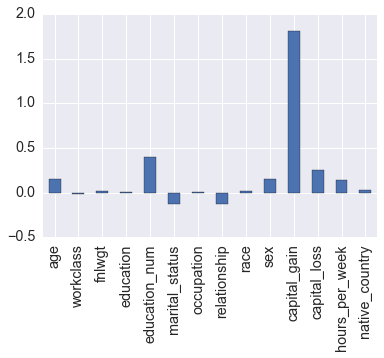

In [52]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df_income.columns)
weights.plot(kind='bar')

In [53]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_income.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['target'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df_income['target'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10453 entries, 26798 to 8298
Data columns (total 15 columns):
age               10453 non-null int64
workclass         10453 non-null int64
fnlwgt            10453 non-null int64
education         10453 non-null int64
education_num     10453 non-null int64
marital_status    10453 non-null int64
occupation        10453 non-null int64
relationship      10453 non-null int64
race              10453 non-null int64
sex               10453 non-null int64
capital_gain      10453 non-null int64
capital_loss      10453 non-null int64
hours_per_week    10453 non-null int64
native_country    10453 non-null int64
target            10453 non-null int64
dtypes: int64(15)
memory usage: 1.3 MB


/Users/p00012387/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


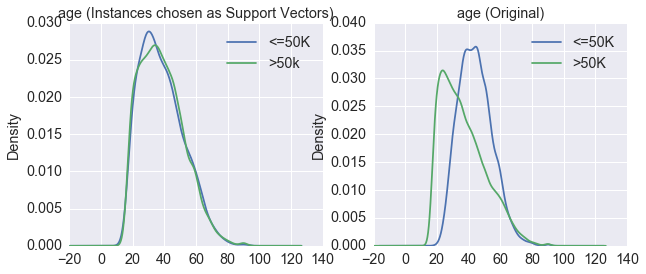

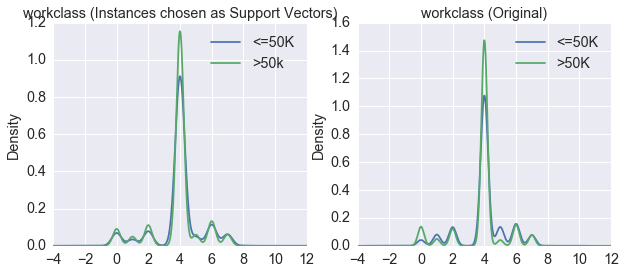

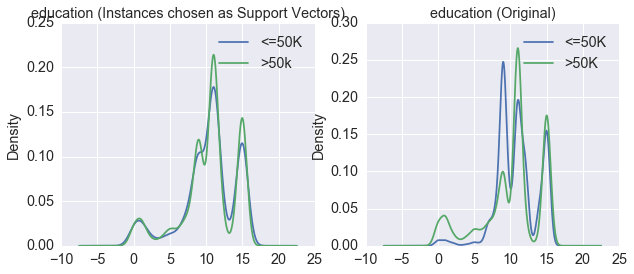

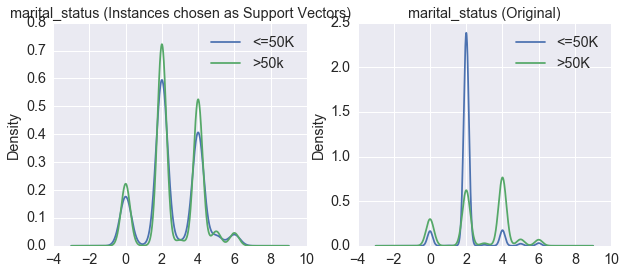

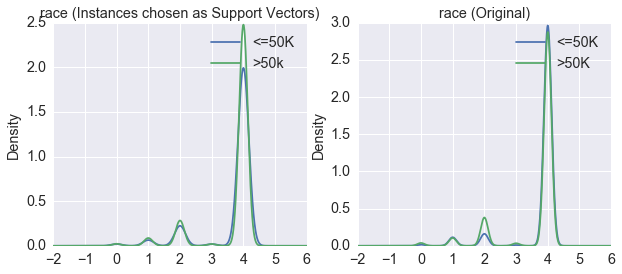

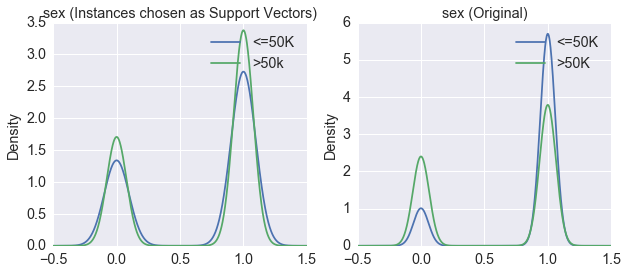

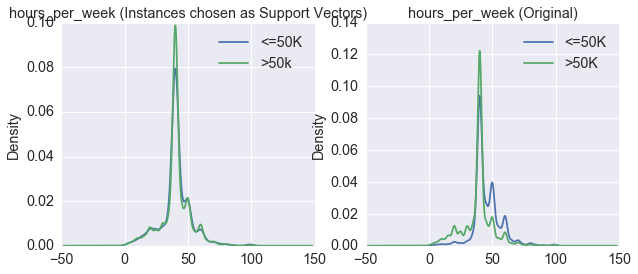

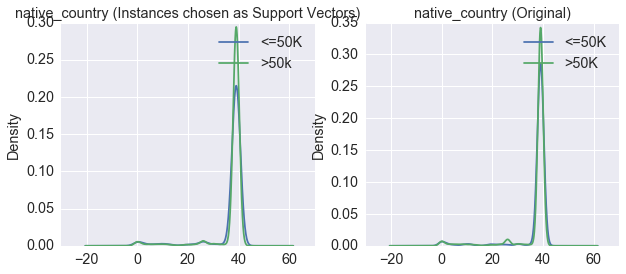

In [58]:

# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['target'])
df_grouped = df_income.groupby(['target'])

# plot KDE of Different variables
vars_to_plot = ['age','workclass','education','marital_status','race','sex','hours_per_week','native_country']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50k'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')


# Appendix: This section is additional and shows other methods and tools used for the analysis of the same income data set. 

* **Additional Logistical Regression analysis using GraphLab Create Turi**
* **Perceptron**

In [83]:
if df_income is not None:
    del df_income

if df_final_income is not None:
    del df_final_income

In [84]:
filename = path + '\income.csv'
df_income = pd.read_csv(filename) # read in the csv file
df_income.info()
df_income['target'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target, dtype: object

In [85]:
# This code turns all of our string entries into integer entries for the purposes of feeding them into the SVM.
# The code in this section is based upon examples found at scikit-learn.org/stable/modules/preprocessing.html#label-encoding

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_income['workclass'] = encoder.fit_transform(df_income['workclass'])
df_income['native-country'] = encoder.fit_transform(df_income['native-country'])
df_income['education'] = encoder.fit_transform(df_income['education'])
df_income['marital-status'] = encoder.fit_transform(df_income['marital-status'])
df_income['occupation'] = encoder.fit_transform(df_income['occupation'])
df_income['relationship'] = encoder.fit_transform(df_income['relationship'])
df_income['race'] = encoder.fit_transform(df_income['race'])
df_income['sex'] = encoder.fit_transform(df_income['sex'])

df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [86]:
#
# Pythonic way of creating a new binary variable
# This code creates a target array 
# - with 0 representing under 50,000 USD a year and 
# - 1 representing over 50,000 USD a year
df_income['is_target'] = df_income['target'] == " <=50K"
df_income.is_target = df_income.is_target.astype(np.int)

In [87]:
df_income['is_target'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_target, dtype: int32

In [88]:
df_income['is_target']
len(df_income['is_target'])

32561

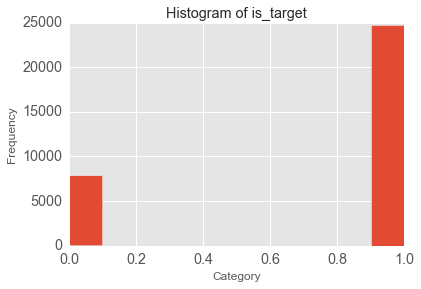

In [89]:
# histogram of is_target
df_income['is_target'].hist()
plt.title('Histogram of is_target')
plt.xlabel('Category')
plt.ylabel('Frequency')

In [90]:
# This drops the target column from the data
# Clean up the data set and remove the target column
if 'target' in df_income:
    del df_income['target']
    
list(df_income)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'is_target']

In [91]:
# rename columns with the '-' character and replace with '_'
df_income.rename(columns={'education-num': 'education_num',
                          'marital-status': 'marital_status',
                          'capital-gain': 'capital_gain',
                          'capital-loss': 'capital_loss',
                          'hours-per-week': 'hours_per_week',
                          'native-country': 'native_country'}, 
                 inplace=True)
list(df_income)

df_final_income = df_income

In [92]:
output_feature = ["is_target"]

#  Set up model using all relevant features
custom_lrm_features = list(df_final_income)

In [93]:
custom_lrm_features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'is_target']

In [94]:
# Get the data ready for Logistic Regression
if 'is_target' in custom_lrm_features:
    custom_lrm_features.remove('is_target')
    #custom_lrm_features.remove('target')
    
custom_lrm_features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [95]:
# final_dc_with_dummy_variables
# Here we will use the Graph Lab Create API to create a SFRAME based on the pandas DataFrame created earlier.
# instantiate a SFRAME based on the input DataFrame named "dc"

'''
To run this code, you MUST MAKE SURE YOU ARE IN THE CORRECT Anaconda Environment!!
RUN THIS COMMAND IN AN ANACONDA COMMAND WINDOW:
==> activate gl-env
'''
sf_income = gl.SFrame(df_final_income)

In [96]:
#custom_lrm_features

# Logistic Regression

The Logistic Regression solution was based upon using the Turi Machine Learning Platform. Here our goal was to get experience in using both the scipy/sklearn and the Turi Machine Learning platforms.

In [97]:
# Make a train-test split
# split data .8 and seed = 0
train_data, test_data = sf_income.random_split(0.8, seed=0) # get training and te

In [98]:
# Make a logistic regression model
# The model is trained with the training data (train_data)
lrm_analyzer_is_target_model = graphlab.logistic_classifier.create(train_data, 
                                                                   target = 'is_target', 
                                                                   features = custom_lrm_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 24845

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

Number of coefficients    : 15

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.045033     | 0.808372          | 0.807267            |

| 2         | 3        | 0.074052     | 0.818032          | 0.818325            |

| 3         | 4        | 0.100072     | 0.823224          | 0.825434            |

| 4         | 5        | 0.129091     | 0.823626          | 0.833333            |

| 5         | 6        | 0.159113     | 0.823506          | 0.833333            |

| 6         | 7        | 0.186133     | 0.823506          | 0.833333            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

# Evaluate the simple lrm_analyzer_is_target_model model

# Get the Weights for the Model

In [99]:
# Evaluate the model and save the results into a dictionary
print lrm_analyzer_is_target_model.evaluate(test_data)

{'f1_score': 0.8938968952509914, 'auc': 0.8563016352180137, 'recall': 0.9446034341782502, 'precision': 0.8483568937029557, 'log_loss': 0.3836526467977136, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+----------------+----------------+------+------+
| threshold |      fpr       |      tpr       |  p   |  n   |
+-----------+----------------+----------------+------+------+
|    0.0    |      1.0       |      1.0       | 4892 | 1558 |
|   1e-05   | 0.980102695764 | 0.999795584628 | 4892 | 1558 |
|   2e-05   | 0.980102695764 | 0.999795584628 | 4892 | 1558 |
|   3e-05   | 0.97946084724  | 0.999795584628 | 4892 | 1558 |
|   4e-05   | 0.97946084724  | 0.999795584628 | 4892 | 1558 |
|   5e-05   | 0.978818998716 | 0.999795584628 | 4892 | 1558 |
|   6e-05   | 0.978177150193 | 0.999795584628 | 4892 | 1558 |
|   7e-05   | 0.976893453145 | 0.999795584628 | 4892 | 1558 |
|   8e-05   | 0.976893453145 | 0.999795584628 | 4892 | 1558 |
|   9

In [100]:
lrm_analyzer_is_target_model.get('coefficients')   # get the weights

name,index,class,value,stderr
(intercept),None,1,8.24149239476,0.217691954502
age,None,1,-0.0341843851094,0.00154556916383
workclass,None,1,0.0183678047375,0.0128606781568
fnlwgt,None,1,-4.98652992237e-07,1.75263873983e-07
education,None,1,-0.0152157544684,0.00593503418459
education_num,None,1,-0.330670941234,0.00825193875314
marital_status,None,1,0.231572223833,0.0140517855326
occupation,None,1,-0.0112880370488,0.0044377022267
relationship,None,1,0.125344300366,0.0165237771438
race,None,1,-0.096514784676,0.0241006097023


# Logistic Regression Analysis

We will now discuss some advanced features that are specific to logistic regression. Making Predictions Predictions using a GraphLab Create classifier is easy. The classify() method provides a one-stop shop for all that you need from a classifier.

In [101]:
# Save predictions (probability estimates) to an SArray
predictions = lrm_analyzer_is_target_model.classify(test_data)
print predictions

+-------+----------------+
| class |  probability   |
+-------+----------------+
|   1   | 0.950521140205 |
|   1   | 0.975589372335 |
|   0   | 0.598663332717 |
|   1   | 0.797867500106 |
|   1   | 0.876638296783 |
|   1   | 0.578779862616 |
|   0   | 0.531461041812 |
|   1   | 0.969905226393 |
|   1   | 0.982304433039 |
|   0   | 0.553762067933 |
+-------+----------------+
[6450 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


# GraphLab Create's logistic regression model can return predictions for any of these types:

In [102]:
class_predictions = lrm_analyzer_is_target_model.predict(test_data, output_type = "class")  # Class

# Evaluating Results

We can also evaluate our predictions by comparing them to known ratings. The results are evaluated using two metrics:

* Classification Accuracy: Fraction of test set examples with correct class label predictions.
* Confusion Matrix: Cross- tabulation of predicted and actual class labels.

In [104]:
result = lrm_analyzer_is_target_model.evaluate(test_data)
print "Accuracy         : {:04.2f}".format(result['accuracy'])
print "Confusion Matrix : \n%s" % result['confusion_matrix']

Accuracy         : 0.83
Confusion Matrix : 
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |  826  |
|      1       |        0        |  271  |
|      0       |        0        |  732  |
|      1       |        1        |  4621 |
+--------------+-----------------+-------+
[4 rows x 3 columns]



# Perceptron Model

### Please note that the following code found in this section is based upon concepts and examples found in Chapter 3 of "Machine Learning in Python" by Sebastian Raschka

In [35]:
# This code builds a Perceptron and fits the training data to it.
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [36]:
# This reports the number of samples that were misclassified by the model

y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1406


In [37]:
# This reports the accuracy of our predictor as a percentage

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.78
